In [1]:
#Import all the necessary libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import re
import plotly.express as px
from collections import defaultdict

import plotly.io as pio
import json
import plotly.graph_objs as go
import matplotlib.colors as mcolors

import json
import ipywidgets as widgets
# from IPython.display import display
from IPython.display import SVG, display
import warnings
from IPython.display import display, Image, clear_output
import time
##Custom scripts
# from parsing_function import full_parse
# from parsing_function import filter_dataframe
# from parsing_function import hex_to_rgba_hex
# from parsing_function import json_to_string
# from parsing_function import prep_edge_R

# from plotting_functions import make_pie_chart_no_replicates

# from plotting_functions import average_pie_chart_no_repeats

# from plotting_functions import make_bar_plot_comparisons

from demo_scripts import full_parse
from demo_scripts import filter_dataframe
from demo_scripts import hex_to_rgba_hex
from demo_scripts import json_to_string
from demo_scripts import prep_edge_R

from demo_scripts import make_pie_chart_no_replicates

from demo_scripts import average_pie_chart_no_repeats

from demo_scripts import make_bar_plot_comparisons

##Add a way to include a custom color scheme


load_previously_parsed = True

custom_data=False



Project_Folder ='demo_data2/'
file_name_to_save = 'Brain_5xFAD'

extra_name = "_"
tolerance = 0.1
remove_std = True
save_data= True


folder_name_to_save = Project_Folder+ 'Processed Results/'
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
mzml_folder = Project_Folder +"mzml/"
Pre_edge_r_path = Project_Folder+"Pre_EdgeR/"
plots_2_save_path = Project_Folder+"Plots/"
label_file = Project_Folder+"Labels/labels.csv"
##Labels DF and Labels List
labels_df = pd.read_csv(label_file)
labels_df['Brain Region'] = labels_df['Brain Region'].str.strip()

labels_list = list(labels_df)
labels_list = labels_list +["Class","Lipid"]
labels_list = [region.strip() for region in labels_list]


No module named 'ms_deisotope._c.averagine' averagine
No module named 'ms_deisotope._c.scoring'
No module named 'ms_deisotope._c.deconvoluter_base'
No module named 'ms_deisotope._c.deconvoluter_base'
No module named 'ms_deisotope._c.deconvoluter_base'


In [2]:
# Assuming labels_df is your DataFrame and 'Sample Name' is the column with instances you want to select from
unique_samples = labels_df['Sample Name'].unique()

# Create a dropdown selection widget with instances as options
dropdown = widgets.Dropdown(
    options=unique_samples,
    value=unique_samples[0],  # default value
    description='Samples',
    disabled=False,
)
display(dropdown)

# Create a button to perform the assignment
button = widgets.Button(description="Assign Blank")
display(button)

# Output widget to display the selected sample name
output = widgets.Output()
display(output)

# Global variable to store the selected sample name
global blank_name

def on_button_clicked(b):
    # Declare blank_name as global variable
    global blank_name

    # Assign the selected sample name to blank_name
    blank_name = dropdown.value

    # Display the selected sample name
    with output:
        output.clear_output()
        print(f"Blank is: {blank_name}")

button.on_click(on_button_clicked)

Dropdown(description='Samples', options=('10xBlank_01202023', 'Blank10x_01182023', 'Blank10x_01192023', 'DOD10…

Button(description='Assign Blank', style=ButtonStyle())

Output()

In [6]:
# Ignore warnings
warnings.filterwarnings('ignore')

# # Display GIF
# gif = Image(filename='../Figures/cat_gif.gif') # replace 'your_gif.gif' with the path to your GIF
# display(gif)

print("Your data is PURRing...")

if load_previously_parsed == True:
    df_matched = pd.read_csv(Project_Folder+"Processed Results/"+file_name_to_save+".csv")
    

    
    tag_values = ['TAG14', 'TAG16', 'TAG18', 'TAG20', 'TAG22']
    dag_values = ['DAG16', 'DAG18']

    df_matched.loc[df_matched['method_type'].isin(tag_values), 'Class'] = 'TAG'
    df_matched.loc[df_matched['method_type'].isin(dag_values), 'Class'] = 'DAG'
#     df_matched["Brain Region"]
    df_matched['Brain Region'] = df_matched['Brain Region'].str.strip()

else:
    df_matched = full_parse(data_base_name_location,mzml_folder, folder_name_to_save,labels_df, blank_name, 
                            file_name_to_save,tolerance, custom_data = custom_data, remove_std = remove_std,save_data=save_data)

print("Complete")

Your data is PURRing...


FileNotFoundError: [Errno 2] No such file or directory: 'demo_data2/Processed Results/Brain_5xFAD.csv'

In [3]:

# Assuming df is your DataFrame and 'Sample name' is the column with instances you want to filter
unique_samples = labels_df['Sample Name'].unique()

# Create a multiple selection widget with instances as options
multi_select = widgets.SelectMultiple(
    options=unique_samples,
    value=[unique_samples[0]],  # default value
    rows=len(unique_samples),
    description='Samples',
    disabled=False
)
display(multi_select)

# Create a button to perform the filtering
button = widgets.Button(description="Filter Samples")
display(button)

# Output widget to display the resulting dataframe
output = widgets.Output()
display(output)

# Global variable to store the new DataFrame
global labels_df2

def on_button_clicked(b):
    # Declare labels_df2 as global variable
    global labels_df2
    
    # Clear the current output
    with output:
        output.clear_output()
        
    # Filter dataframe to exclude the selection
    labels_df2 = labels_df[~labels_df['Sample Name'].isin(multi_select.value)]
    
    # Display the new dataframe
    with output:
        display(labels_df2)

button.on_click(on_button_clicked)

SelectMultiple(description='Samples', index=(0,), options=('Blank_Blank_Blank_Blank_Blank', 'IPA_clean_clean_c…

Button(description='Filter Samples', style=ButtonStyle())

Output()

In [4]:
labels_df2 = labels_df2.drop(["Sample Name","Position"],axis=1)
main_json = {col: labels_df2[col].unique().tolist() for col in labels_df2}

In [5]:
# List to hold pairs of JSON objects
json_list_pairs = []

In [6]:
# List to hold pairs of JSON objects
json_list_pairs = []

def remove_empty_entries(json_list_pairs):
    cleaned_list_pairs = [
        [
            {key: value for key, value in pair_dict.items() if value} for pair_dict in pair
        ] for pair in json_list_pairs
    ]
    return cleaned_list_pairs

# Initialize widgets_dict1 and widgets_dict2 to be filled later
widgets_dict1 = {}
widgets_dict2 = {}

# Create a function that displays the pair widgets
def display_pair_widgets():
    global widgets_dict1, widgets_dict2
    widgets_dict1 = {key: widgets.SelectMultiple(options=value, description=key) for key, value in main_json.items()}
    widgets_dict2 = {key: widgets.SelectMultiple(options=value, description=key) for key, value in main_json.items()}
    
    for key in main_json.keys():
        display(widgets.HBox([widgets_dict1[key], widgets_dict2[key]]))

display_pair_widgets()

# Define what to do on 'Finish' button click
def on_generate_clicked(b):
    # Build new_json based on the values selected in the widgets
    new_json1 = {key: list(widget.value) for key, widget in widgets_dict1.items()}
    new_json2 = {key: list(widget.value) for key, widget in widgets_dict2.items()}

    # Add new JSON objects to the list
    pair = [new_json1, new_json2]
    json_list_pairs.append(pair)

    # Specify directory
    directory = 'jsons/'

    # If directory does not exist, create it
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    # Save JSON files
    with open(os.path.join(directory, 'JSON1.json'), 'w') as file1:
        json.dump(new_json1, file1, indent=2)
        
    with open(os.path.join(directory, 'JSON2.json'), 'w') as file2:
        json.dump(new_json2, file2, indent=2)

    print("Complete")

# Create the button
generate_button = widgets.Button(description='Finish')
generate_button.on_click(on_generate_clicked)

# Display the button
display(generate_button)


Button(description='Finish', style=ButtonStyle())

Complete


In [7]:
json_list_pairs = remove_empty_entries(json_list_pairs)
def get_unique_json_objects(json_list_pairs):
    json_set = set()
    for pair in json_list_pairs:
        for json_obj in pair:
            json_set.add(json.dumps(json_obj))
    
    json_list_singles = [json.loads(json_str) for json_str in json_set]
    return json_list_singles

json_list_singles = get_unique_json_objects(json_list_pairs)
save_name_pie1 = plots_2_save_path+json_to_string(json_list_singles[0]).replace(" | ","__") + extra_name+ "Average Pie .png"
save_name_pie2 = plots_2_save_path+json_to_string(json_list_singles[1]).replace(" | ","__") + extra_name+ "Average Pie .png"
json1 = json_list_pairs[0][0]
json2 = json_list_pairs[0][1]
custom_name1 = json_to_string(json1)
custom_name2 = json_to_string(json2)
plot_tile = custom_name1+ " vs "+custom_name2+ extra_name
save_name_bar  = plots_2_save_path+plot_tile.replace(" | ","__")+ extra_name+ "bar.png"



# json1 = json_list_pairs[0][0]
# json2 = json_list_pairs[0][1]
        
title1 = json_to_string(json1)
title2 = json_to_string(json2)

title = title1 +" vs "+title2
title = title.replace(" | ","__")
title = title + extra_name
title_for_ridge = plots_2_save_path + "Ridge_Plot_All Lipids_"+title+".png"

title_for_ridge = title_for_ridge.replace(":", "_")

In [8]:
print("Your Comparisons are:",title)

Your Comparisons are: Sex: Male__Genotype: 5xFAD__Brain Region: cortex vs Sex: Male__Genotype: WT__Brain Region: cortex_


In [9]:
average_pie_chart_no_repeats(df_matched,plots_2_save_path,json_list_singles,labels_list,blank_name,extra_name)
make_pie_chart_no_replicates(df_matched,plots_2_save_path,json_list_singles,labels_list,blank_name,extra_name)
make_bar_plot_comparisons(df_matched, plots_2_save_path, json_list_pairs,labels_list,blank_name,extra_name)
labels_list2 = labels_list + ['method_type',"Transition"]
##Remove duplicates
def add_suffix(df):
    df['Count'] = df.groupby(['Lipid', 'Class', 'Sample Name']).cumcount().add(1)
    df['Lipid'] = df.apply(lambda row: row['Lipid'] + '_' + str(row['Count']) if row['Count'] > 1 else row['Lipid'], axis=1)
    df.drop(columns=['Count'], inplace=True)
    return df

df_matched = add_suffix(df_matched)##Remove duplicates
combined_df = prep_edge_R(df_matched,json_list_pairs,Pre_edge_r_path,blank_name,labels_list2,extra_name)
!bash myjob.sh ##Runs EdgeR with Replicates - Add no Replicates ##Fix PCA and Fix Heatmap ##Fix error with no sig lipids


NameError: name 'blank_name' is not defined

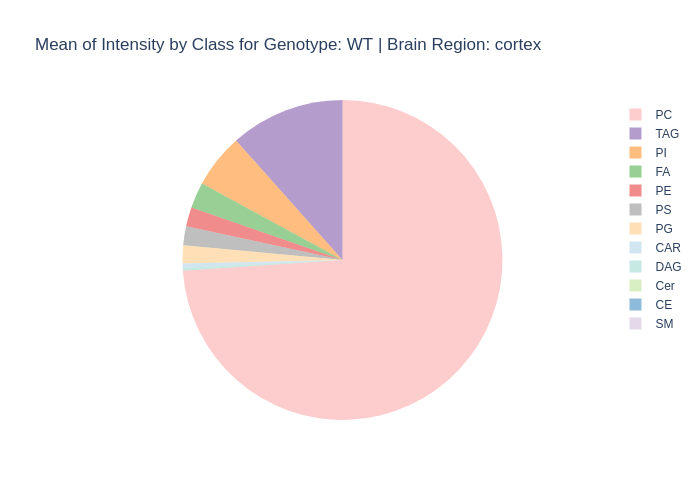

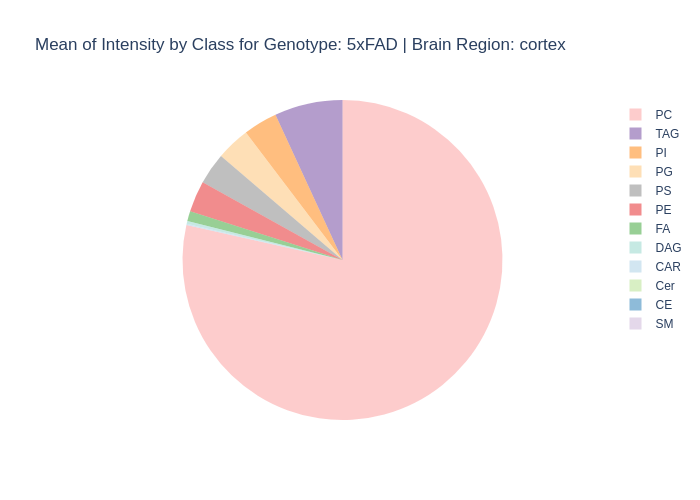

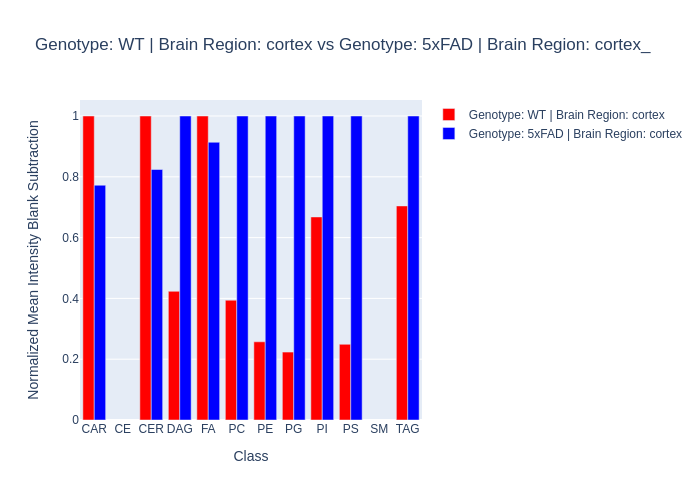

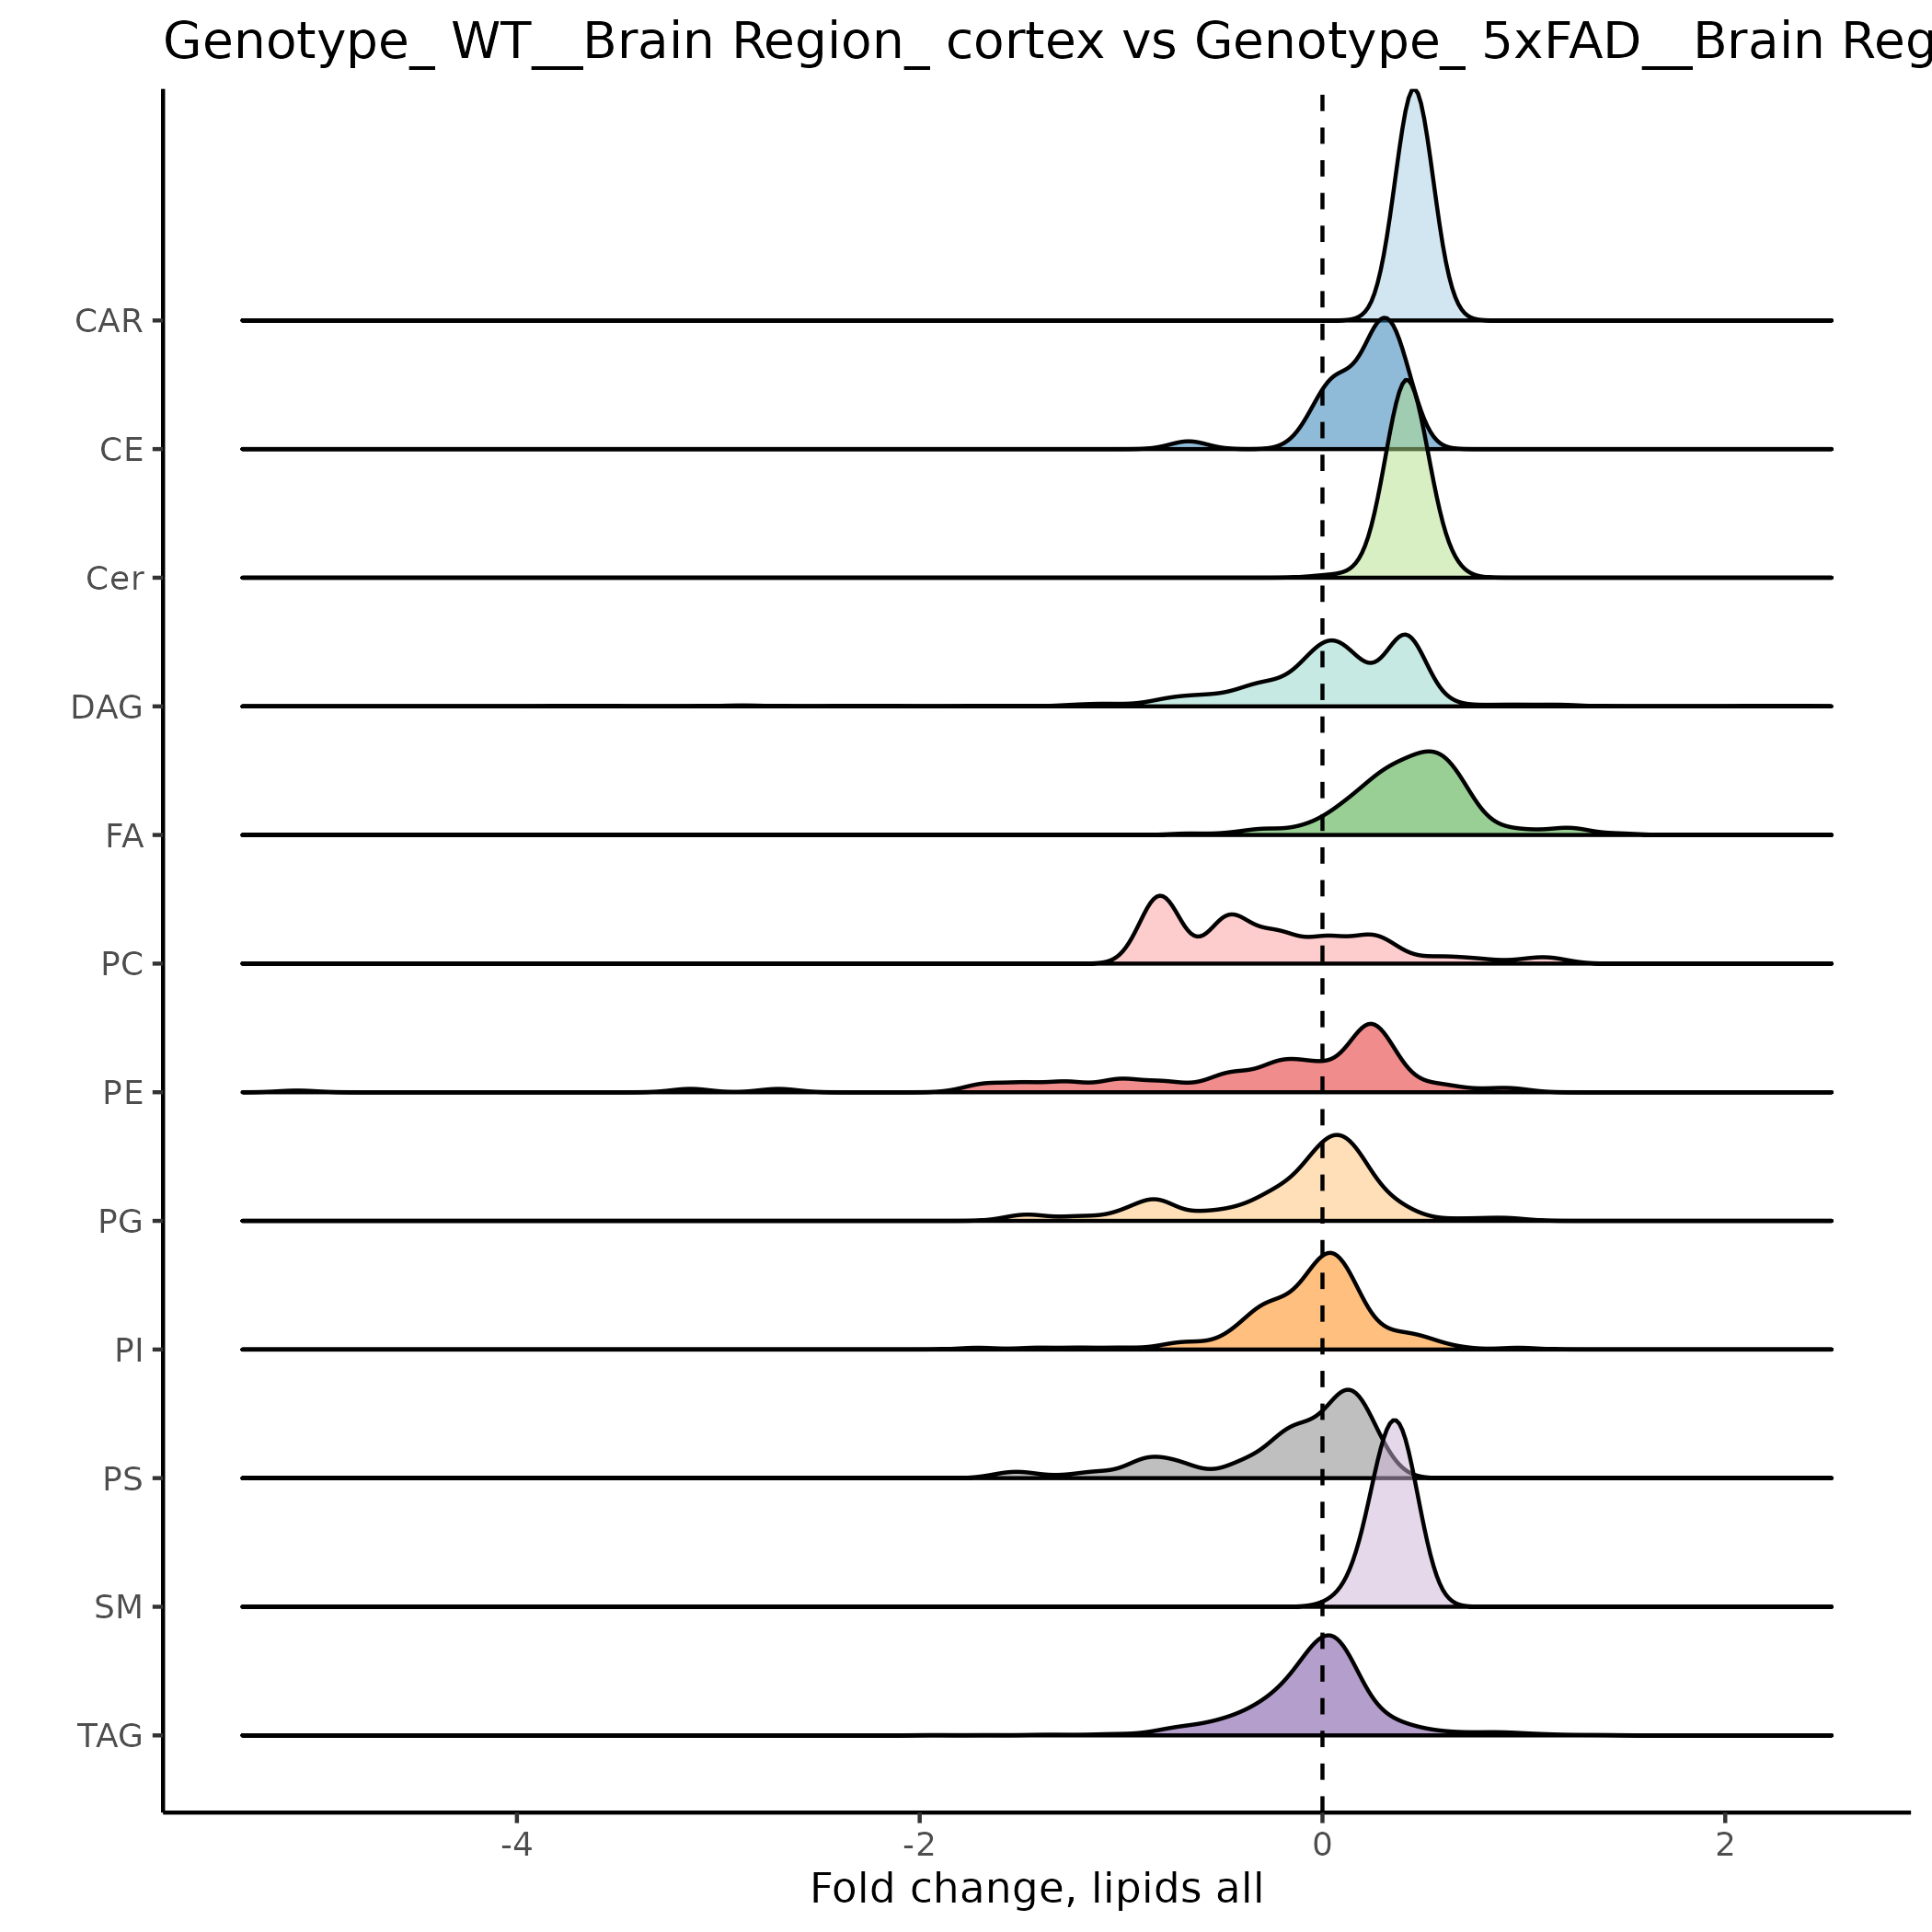

In [24]:
gif = Image(filename=save_name_pie1) # replace 'your_gif.gif' with the path to your GIF
display(gif)
gif = Image(filename=save_name_pie2) # replace 'your_gif.gif' with the path to your GIF
display(gif)
gif = Image(filename=save_name_bar) # replace 'your_gif.gif' with the path to your GIF
display(gif)
gif = Image(filename=title_for_ridge) # replace 'your_gif.gif' with the path to your GIF
display(gif)